In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
import warnings 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_excel(r'C:\Users\User\Documents\juputer\ConcreteTest.xlsx')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,310.00,143.00,111.00,168.00,22.00,914.0,651.00,28,33.687797
1,162.00,190.00,148.00,179.00,19.00,838.0,741.00,28,33.756745
2,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,3,7.315340
3,349.00,0.00,0.00,192.00,0.00,1056.0,809.00,120,40.858348
4,194.68,0.00,100.52,165.62,7.48,1006.4,905.90,14,24.986610


In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,281.608252,76.048188,53.730939,181.769213,6.139854,972.042255,772.370367,45.598706,36.017345
std,104.720626,87.096429,63.376219,21.151044,5.855311,77.771313,80.066773,62.771834,16.539493
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,725.950000,10.500000,24.023412
50%,275.000000,24.000000,0.000000,185.000000,6.350000,968.000000,778.450000,28.000000,34.735801
75%,355.000000,145.000000,118.160000,192.350000,10.130000,1028.400000,822.200000,56.000000,46.229366
max,540.000000,359.400000,200.100000,246.900000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         927 non-null    float64
 1   Blast Furnace Slag             927 non-null    float64
 2   Fly Ash                        927 non-null    float64
 3   Water                          927 non-null    float64
 4   Superplasticizer               927 non-null    float64
 5   Coarse Aggregate               927 non-null    float64
 6   Fine Aggregate                 927 non-null    float64
 7   Age                            927 non-null    int64  
 8   Concrete compressive strength  927 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 65.3 KB


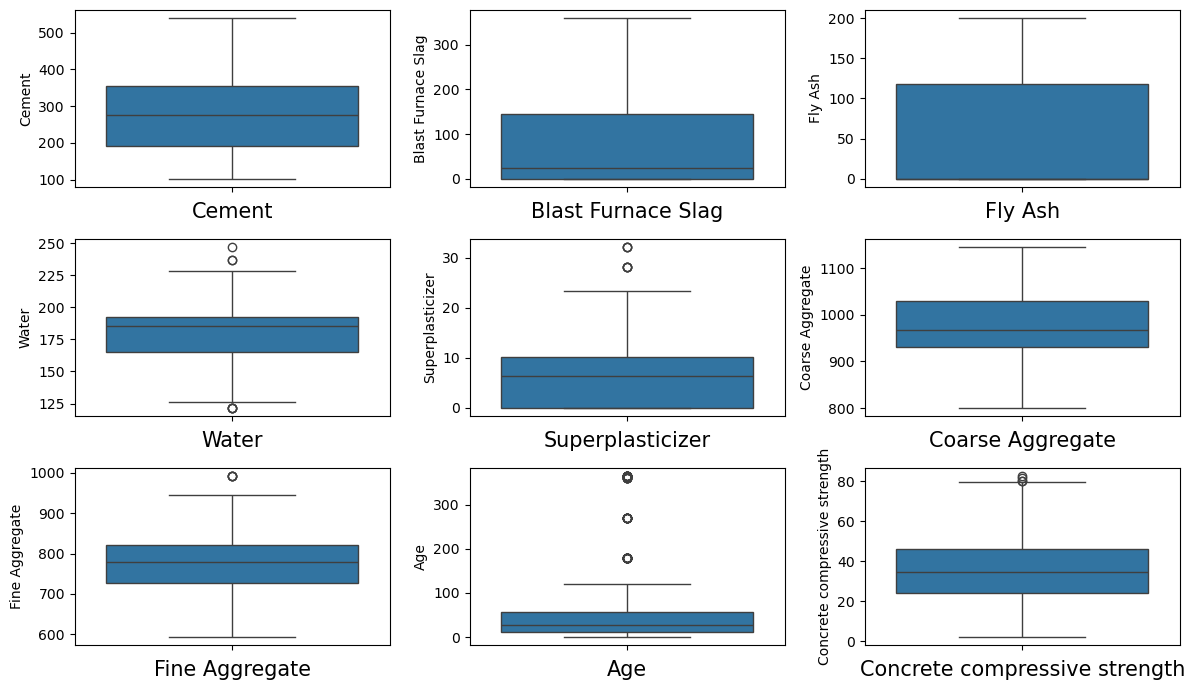

In [15]:
plt.figure(figsize = (12,7 ))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

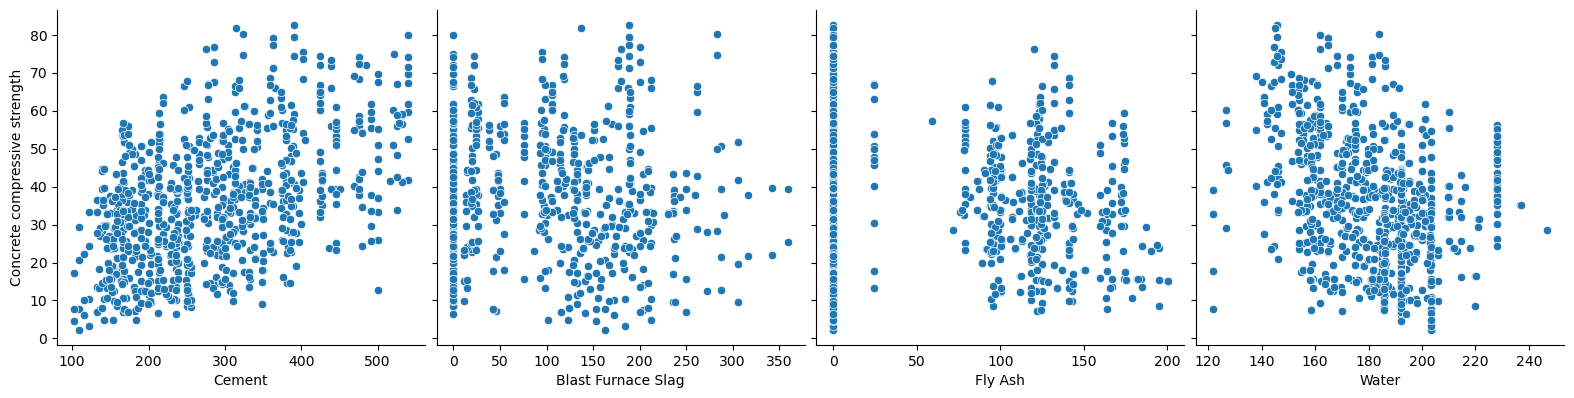

In [16]:
sns.pairplot(df, x_vars=['Cement', 'Blast Furnace Slag','Fly Ash','Water'], 
             y_vars='Concrete compressive strength', height=4, aspect=1, kind='scatter')
plt.show()

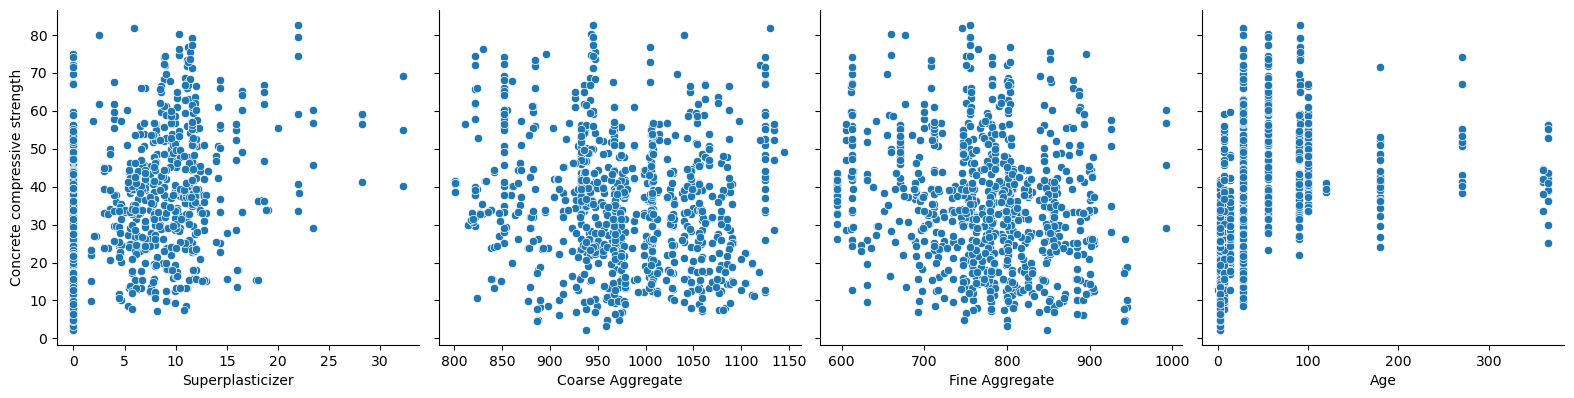

In [17]:
sns.pairplot(df, x_vars=['Superplasticizer','Coarse Aggregate','Fine Aggregate','Age'], 
             y_vars='Concrete compressive strength', height=4, aspect=1, kind='scatter')
plt.show()

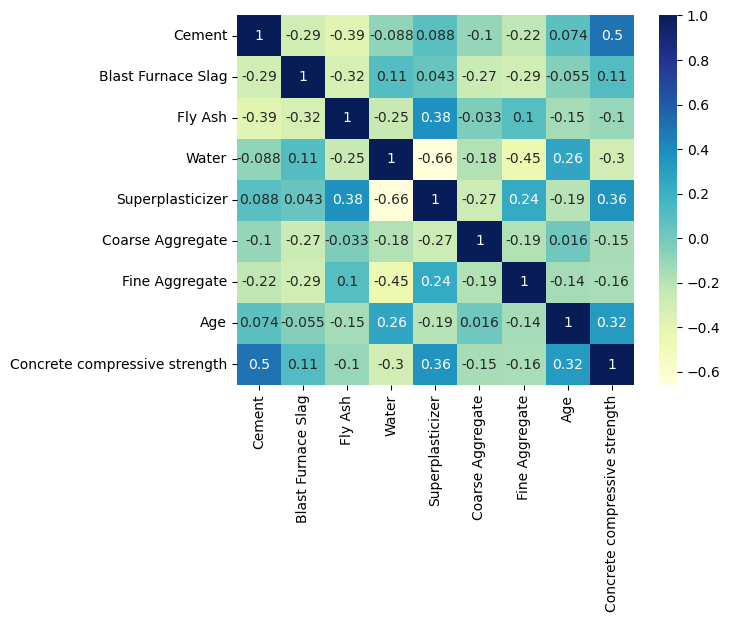

In [18]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [19]:
# Creating X and y
X = df[['Cement', 'Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
y = df['Concrete compressive strength']
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,310.00,143.00,111.00,168.00,22.00,914.0,651.00,28
1,162.00,190.00,148.00,179.00,19.00,838.0,741.00,28
2,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,3
3,349.00,0.00,0.00,192.00,0.00,1056.0,809.00,120
4,194.68,0.00,100.52,165.62,7.48,1006.4,905.90,14
...,...,...,...,...,...,...,...,...
922,166.09,0.00,163.27,176.46,4.49,1058.6,780.09,100
923,296.00,0.00,106.70,221.40,10.50,819.2,778.40,28
924,236.00,0.00,0.00,194.00,0.00,968.0,885.00,14
925,165.00,128.50,132.10,175.06,8.08,1005.8,746.60,3


In [20]:
y

0      33.687797
1      33.756745
2       7.315340
3      40.858348
4      24.986610
         ...    
922    33.543007
923    31.420111
924    12.838043
925    19.415644
926    21.752968
Name: Concrete compressive strength, Length: 927, dtype: float64

In [21]:
X_sm = sm.add_constant(X)
X_sm

,const,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.0,310.00,143.00,111.00,168.00,22.00,914.0,651.00,28
1,1.0,162.00,190.00,148.00,179.00,19.00,838.0,741.00,28
2,1.0,182.04,45.21,121.97,170.21,8.19,1059.4,780.65,3
3,1.0,349.00,0.00,0.00,192.00,0.00,1056.0,809.00,120
4,1.0,194.68,0.00,100.52,165.62,7.48,1006.4,905.90,14
...,...,...,...,...,...,...,...,...,...
922,1.0,166.09,0.00,163.27,176.46,4.49,1058.6,780.09,100
923,1.0,296.00,0.00,106.70,221.40,10.50,819.2,778.40,28
924,1.0,236.00,0.00,0.00,194.00,0.00,968.0,885.00,14
925,1.0,165.00,128.50,132.10,175.06,8.08,1005.8,746.60,3


In [22]:
lr = sm.OLS(y, X_sm).fit()
lr.params

const                -14.989542
Cement                 0.116849
Blast Furnace Slag     0.098162
Fly Ash                0.083621
Water                 -0.158765
Superplasticizer       0.281249
Coarse Aggregate       0.015461
Fine Aggregate         0.017024
Age                    0.111794
dtype: float64

In [23]:
y_pred = lr.predict(X_sm)
res = (y - y_pred)
y_pred

0      52.411635
1      40.592577
2      26.203117
3      38.822005
4      24.520111
         ...    
922    32.144200
923    25.369737
924    13.383700
925    31.025699
926    20.167081
Length: 927, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
X_train_lm

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
516,362.60,189.00,0.00,164.90,11.60,944.7,755.80,56
111,251.37,0.00,118.27,188.45,5.75,1028.4,757.73,3
639,265.00,111.00,86.00,195.00,6.00,833.0,790.00,28
105,229.68,0.00,118.16,195.23,6.13,1028.1,757.63,56
510,500.00,0.00,0.00,200.00,0.00,1125.0,613.00,14
...,...,...,...,...,...,...,...,...
855,531.30,0.00,0.00,141.80,28.20,852.1,893.70,28
871,376.00,0.00,0.00,214.60,0.00,1003.5,762.36,100
835,250.00,0.00,95.69,191.84,5.33,948.9,857.20,100
792,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,56


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 300)

In [28]:
x_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
235,425.00,106.30,0.00,153.50,16.50,852.10,887.10,28
298,251.37,0.00,118.27,188.45,6.35,1028.40,757.73,28
119,249.10,0.00,98.75,158.11,12.80,987.76,889.01,56
81,425.00,106.30,0.00,153.50,16.50,852.10,887.10,7
169,153.00,102.00,0.00,192.00,0.00,888.00,943.10,28
...,...,...,...,...,...,...,...,...
9,330.50,169.60,0.00,194.90,8.10,811.00,802.30,28
714,156.00,243.00,0.00,180.00,11.00,1022.00,698.00,28
917,173.81,93.37,159.90,172.34,9.73,1007.20,746.60,14
481,322.00,0.00,116.00,196.00,10.00,818.00,813.00,28


In [29]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [30]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  -14.505139207380587
Coefficients:


[('Cement', 0.1120749972846715),
 ('Blast Furnace Slag', 0.09280698473119625),
 ('Fly Ash', 0.08068380173534735),
 ('Water', -0.1457627321796067),
 ('Superplasticizer', 0.35177938534348946),
 ('Coarse Aggregate', 0.016019574751177323),
 ('Fine Aggregate', 0.013904358836959195),
 ('Age', 0.11930783046422695)]

In [31]:
y_pred_mlr= mlr.predict(x_test)

print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [22.28235545 29.30467012 29.22437506 20.04091042 62.56017686 37.15968376
 26.18088865 58.08150496 46.25443011 55.76711735 25.3603606  43.61965318
 29.96032978 49.6629113  30.28092689 19.46961925 47.17827032 43.21888995
 67.55281722 24.86850252 31.58407677 43.3255406  29.84447734 35.47805559
 13.78742268 46.83903565 49.4865532  33.94691886 30.18235708 20.97187121
 23.52809162 50.78883407 52.2920447  33.1866595  40.59551619 50.97590562
 23.68644544 45.37631314 35.11930247 53.30370801 62.66029941 20.23968673
 63.26374653 30.68119506 34.55950387 28.17436191 22.54637486 24.24307271
 33.38717247 28.12850676 48.5652922  22.93068657 22.94997715 25.75941834
 56.04198644 53.78062253 28.23238067 26.71241657 17.29390448 43.64764589
 25.3426423  33.17848778 48.86919773 27.94261751 20.14444421 48.02139509
 27.65560134 24.85083837 28.66615906 24.32982287 53.24188877 41.67226467
 25.80772435 53.16905526 36.27196833 33.28927256 28.37970265 54.34631535
 53.02159607 60.1393404  4

In [32]:
res = (y_test - y_pred_mlr)
res

113     8.157320
33      3.617809
565    -5.223716
562    -5.402645
804   -24.445944
         ...    
415    -5.498548
635   -10.125242
149   -27.298405
794    -4.094361
433     1.228894
Name: Concrete compressive strength, Length: 279, dtype: float64

In [33]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
print('R2: {:.2f}'.format(mlr.score(X,y)))
print('RSE:', meanAbErr)

R2: 0.60
RSE: 8.452177312528155


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(648, 8)
(648,)
(279, 8)
(279,)


In [36]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
y_pred_rf= mlr.predict(x_test)
y_pred

0      52.411635
1      40.592577
2      26.203117
3      38.822005
4      24.520111
         ...    
922    32.144200
923    25.369737
924    13.383700
925    31.025699
926    20.167081
Length: 927, dtype: float64

In [38]:
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)

361.15878960143283


In [39]:
print(rmse)

19.004178214314685


In [40]:
X = df[['Cement', 'Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
y = df['Concrete compressive strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, test_size = 0.3,  random_state =42)

In [41]:
rf = RandomForestRegressor(n_estimators=20000, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rase = np.sqrt(mean_squared_error(y_test, rf_pred))

In [42]:
print("Random forest Regression")
print("Rmse:", rf_rase)

Random forest Regression
Rmse: 6.767609121114337
